In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
## plotting variables
fig_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/02_figures/'
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['pdf.fonttype'] = 42

### Read invivo/exvivo results

In [3]:
table_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/01_data/ASK_joint/SCENIC_results/'

In [4]:
## read in vivo regulons
invivo = pd.read_csv(table_dir + 'AlvEpi_SCENIC_scores_INVIVO_treatment.csv', index_col=0)
invivo.head(5)

,regulon,healthy,ILD
1,AR_REG,0.212567,0.085232
2,ARID3A_REG,0.486541,0.253126
3,ARNT_REG,0.450489,0.270957
4,ARNTL_REG,0.537339,0.291920
5,ATF1_REG,0.516384,0.320439


In [5]:
## read in vivo regulons
exvivo = pd.read_csv(table_dir + 'AlvEpi_SCENIC_scores_EXVIVO_treatment.csv', index_col=0)
exvivo.head(5)

,regulon,Fibrotic Cocktail,Control Cocktail
1,ARID3A_REG,0.232600,0.301742
2,ARNT_REG,0.257970,0.293085
3,ARNT2_REG,0.285974,0.420998
4,ARNTL_REG,0.333961,0.394929
5,ATF1_REG,0.358866,0.482995


### Compute regulon log2FC

In [6]:
invivo['invivo_log2FC'] = np.log2(invivo['ILD']/invivo['healthy'])
exvivo['exvivo_log2FC'] = np.log2(exvivo['Fibrotic Cocktail']/exvivo['Control Cocktail'])

In [7]:
tab = invivo.merge(exvivo, left_on = 'regulon', right_on = 'regulon')

In [8]:
tab

,regulon,healthy,ILD,invivo_log2FC,Fibrotic Cocktail,Control Cocktail,exvivo_log2FC
0,ARID3A_REG,0.486541,0.253126,-0.942705,0.232600,0.301742,-0.375462
1,ARNT_REG,0.450489,0.270957,-0.733426,0.257970,0.293085,-0.184116
2,ARNTL_REG,0.537339,0.291920,-0.880258,0.333961,0.394929,-0.241914
3,ATF1_REG,0.516384,0.320439,-0.688397,0.358866,0.482995,-0.428564
4,ATF2_REG,0.504529,0.297899,-0.760111,0.376102,0.487558,-0.374450
...,...,...,...,...,...,...,...
267,ZNF76_REG,0.550751,0.306834,-0.843941,0.373329,0.471391,-0.336475
268,ZNF805_REG,0.313816,0.226515,-0.470312,0.057410,0.072370,-0.334087
269,ZNF808_REG,0.384593,0.219922,-0.806337,0.214120,0.204623,0.065449
270,ZNF90_REG,0.242890,0.213708,-0.184663,0.047100,0.095159,-1.014607


In [9]:
conserved = tab[((tab['invivo_log2FC'] > 0) & (tab['exvivo_log2FC'] > 0)) | ((tab['invivo_log2FC'] < 0) & (tab['exvivo_log2FC'] < 0))]

In [10]:
conserved = conserved.set_index('regulon')

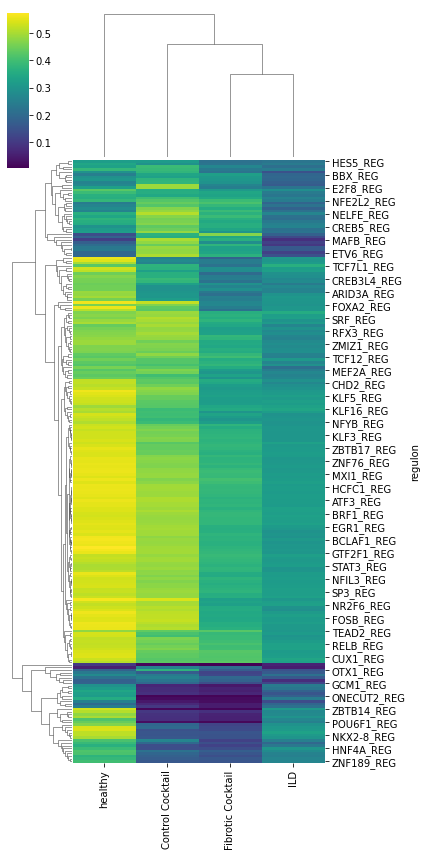

In [11]:
sb.clustermap(conserved[['Control Cocktail','Fibrotic Cocktail','healthy','ILD']], cmap = 'viridis', figsize = (6,12))

In [12]:
top25_invivo = tab.sort_values(by = 'ILD', ascending = False).head(40)['regulon'].to_list()
bottom25_invivo = tab.sort_values(by = 'healthy', ascending = True).tail(35)['regulon'].to_list()

In [13]:
top25_exvivo = tab.sort_values(by = 'Fibrotic Cocktail', ascending = False).head(40)['regulon'].to_list()
bottom25_exvivo = tab.sort_values(by = 'Control Cocktail', ascending = True).tail(35)['regulon'].to_list()

In [14]:
top_induced = np.intersect1d(top25_invivo, top25_exvivo)
top_healthy = np.intersect1d(bottom25_invivo, bottom25_exvivo)

In [15]:
induced_tab = tab[tab['regulon'].isin(top_induced)][['regulon','ILD','Fibrotic Cocktail']]
induced_tab

,regulon,ILD,Fibrotic Cocktail
13,BCL3_REG,0.350228,0.441951
32,CUX1_REG,0.320478,0.417847
49,ELK3_REG,0.327614,0.440537
63,FOSL1_REG,0.330234,0.396235
64,FOSL2_REG,0.337980,0.419151
78,FOXP4_REG,0.328095,0.414809
79,GABPA_REG,0.322846,0.388690
102,IRF1_REG,0.323991,0.395508
144,NFKB1_REG,0.330355,0.451510
145,NFKB2_REG,0.328088,0.427954


In [16]:
induced_tab_invivo = induced_tab[['regulon','ILD']]
induced_tab_invivo.rename(columns = {'ILD':'RSS'}, inplace = True)
induced_tab_invivo['condition'] = 'invivo - IPF'
induced_tab_invivo = induced_tab_invivo.sort_values(by = 'RSS', ascending = False)

/home/niklas/miniconda3/envs/niche_fibrosis_env/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [17]:
induced_tab_exvivo = induced_tab[['regulon','Fibrotic Cocktail']]
induced_tab_exvivo.rename(columns = {'Fibrotic Cocktail':'RSS'}, inplace = True)
induced_tab_exvivo['condition'] = 'exvivo - FC'

In [18]:
conserved_induced = pd.concat([induced_tab_invivo, induced_tab_exvivo], axis=0)

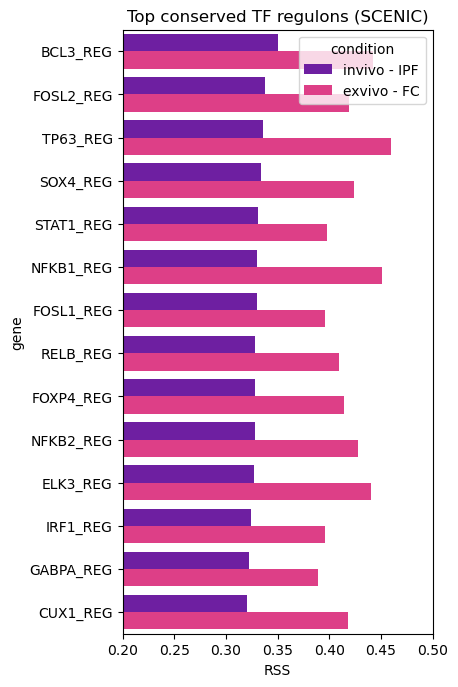

In [19]:
sb.barplot(data = conserved_induced,
           x = 'RSS',
           y = 'regulon',
           hue = 'condition',
           palette = ['#7209b7','#f72585'],
           ax = plt.figure(figsize=(4, 8), dpi = 100).gca()
          ).set(title='Top conserved TF regulons (SCENIC)',
                xlabel = 'RSS',
                ylabel = 'gene',
                xlim = (0.2,0.5)
               )
plt.savefig(fig_dir + 'barplot_Alveolar_Epithelium_conserved_TF_regulons_IPF.pdf')
plt.show()

In [20]:
bottom_tab = tab[tab['regulon'].isin(top_healthy)][['regulon','healthy','Control Cocktail']]
bottom_tab

,regulon,healthy,Control Cocktail
5,ATF3_REG,0.557908,0.503026
6,ATF4_REG,0.564869,0.494904
19,CEBPA_REG,0.561351,0.522647
21,CEBPD_REG,0.551384,0.519774
31,CTCF_REG,0.556700,0.503010
37,E2F1_REG,0.564311,0.542229
52,ESRRA_REG,0.554308,0.510510
61,FOS_REG,0.558958,0.516227
85,GTF2F1_REG,0.554947,0.494594
87,HCFC1_REG,0.554537,0.496070


In [21]:
bottom_tab_invivo = bottom_tab[['regulon','healthy']]
bottom_tab_invivo.rename(columns = {'healthy':'RSS'}, inplace = True)
bottom_tab_invivo['condition'] = 'invivo - healthy'
bottom_tab_invivo = bottom_tab_invivo.sort_values(by = 'RSS', ascending = False)

/home/niklas/miniconda3/envs/niche_fibrosis_env/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [22]:
bottom_tab_exvivo = bottom_tab[['regulon','Control Cocktail']]
bottom_tab_exvivo.rename(columns = {'Control Cocktail':'RSS'}, inplace = True)
bottom_tab_exvivo['condition'] = 'exvivo - CC'

In [23]:
conserved_repressed = pd.concat([bottom_tab_invivo, bottom_tab_exvivo], axis=0)

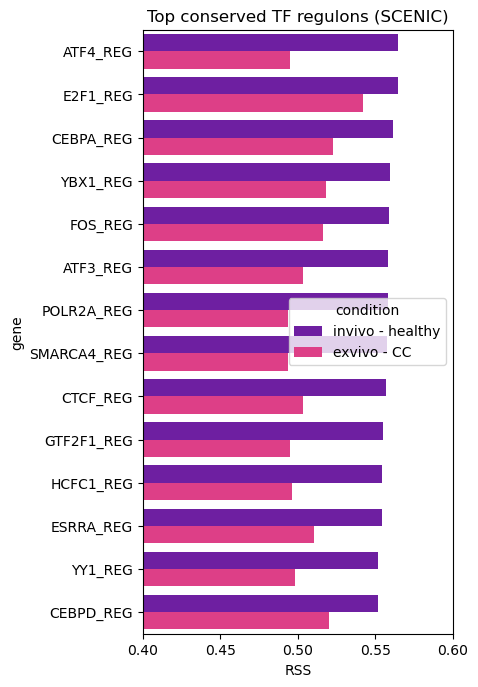

In [24]:
sb.barplot(data = conserved_repressed,
           x = 'RSS',
           y = 'regulon',
           hue = 'condition',
           palette = ['#7209b7','#f72585'],
           ax = plt.figure(figsize=(4, 8), dpi = 100).gca()
          ).set(title='Top conserved TF regulons (SCENIC)',
                xlabel = 'RSS',
                ylabel = 'gene',
                xlim = (0.4,0.6)
               )
plt.savefig(fig_dir + 'barplot_Alveolar_Epithelium_conserved_TF_regulons_healthy.pdf')
plt.show()

### Visualize both plots in one 

In [25]:
conserved_repressed['RSS'] = conserved_repressed['RSS']*(-1)

In [26]:
conserved = pd.concat([conserved_induced, conserved_repressed], axis=0)
#conserved

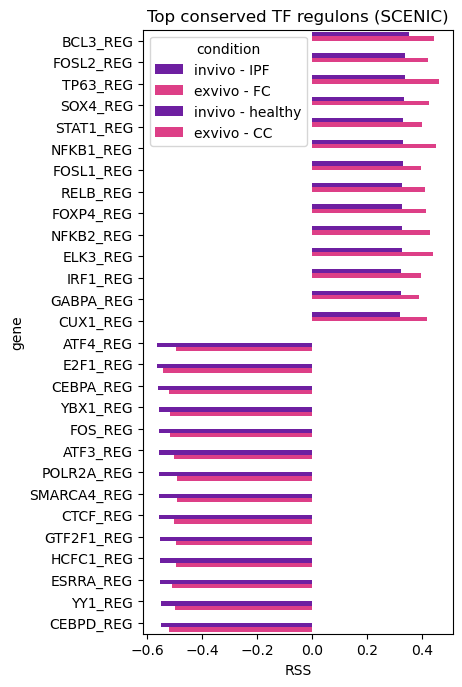

In [27]:
sb.barplot(data = conserved,
           x = 'RSS',
           y = 'regulon',
           hue = 'condition',
           palette = ['#7209b7','#f72585'],
           ax = plt.figure(figsize=(4, 8), dpi = 100).gca()
          ).set(title='Top conserved TF regulons (SCENIC)',
                xlabel = 'RSS',
                ylabel = 'gene'
               )
#plt.savefig(fig_dir + 'barplot_fibroblasts_conserved_TF_regulons_healthy.pdf')
plt.show()